In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/IRIS.csv'
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().values.any()

False

In [5]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
X = df[['sepal_length', 'sepal_width', 'petal_length',	'petal_width']]
y = df['species']

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
print("Actual Labels:", y_test)
print("Predicted Labels:", y_pred)

Actual Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [16]:
correct_predictions = (y_test == y_pred).sum()
total_predictions = len(y_test)

In [17]:
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


# Create new dummy data with different measurements

In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create new dummy data with different measurements
new_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Should be classified as 'setosa'
    [6.0, 3.0, 4.8, 1.8],  # Should be classified as 'versicolor'
    [6.5, 3.0, 6.0, 2.0]   # Should be classified as 'virginica'
])

# Standardize the new data using the same scaler used for training
new_data_standardized = pd.DataFrame(new_data)

# Make predictions on the new data
new_predictions = model.predict(new_data_standardized)

# Decode the predicted labels from numerical values to species names
predicted_species = label_encoder.inverse_transform(new_predictions)

# Print the predicted species
print("Predicted Species:", predicted_species)


Predicted Species: ['Iris-setosa' 'Iris-virginica' 'Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


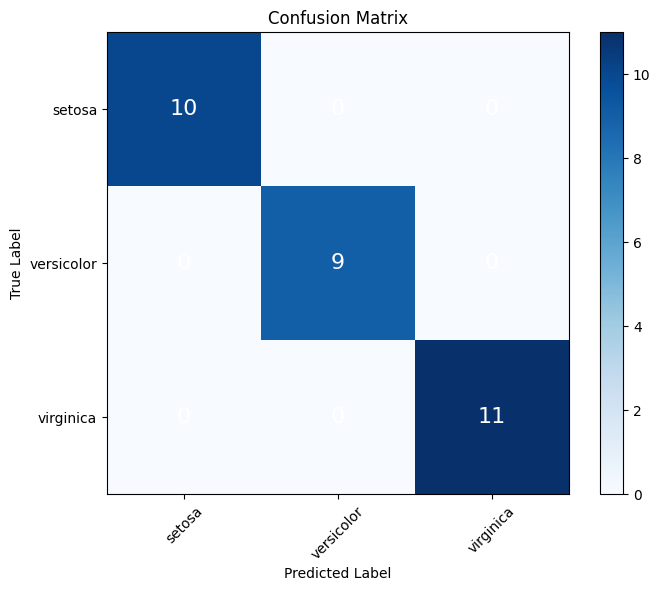

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['setosa', 'versicolor', 'virginica']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, confusion[i, j], horizontalalignment='center', verticalalignment='center', fontsize=16, color='white')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
